# 10 Reducción de dimensionalidad

- Concepto de reducción de dimensionalidad
- Análisis de Componentes Principales (PCA)

## Versión v.1

El notebook lo puedo modificar, esta versión es la v.1 a 02/02/2024 a las 2pm de Caracas.

## Aprendizaje Automático [UCV]

* Autor: Fernando Crema García
* Contacto: fernando.cremagarcia@kuleuven.be; fernando.cremagarcia@esat.kuleuven.be

---

# Reducción de Dimensionalidad

El objetivo es reducir la cantidad de características (dimensiones) en un conjunto de datos mientras se conserve información relevante. Esto puede proporcionar varios beneficios, como la simplificación de modelos, la reducción de la complejidad computacional y la eliminación del ruido en los datos.

## Técnicas Comunes

### 1. Principal Component Analysis (PCA)

- PCA es una técnica de reducción de dimensionalidad lineal que busca encontrar las proyecciones más significativas de los datos originales en un espacio de dimensiones reducidas llamadas "componentes principales". Estos componentes capturan la mayor varianza de los datos.

### 2. t-Distributed Stochastic Neighbor Embedding (t-SNE)

- t-SNE es una técnica no lineal que se utiliza principalmente para la visualización de datos en dimensiones bajas. Convierte las similitudes entre puntos en probabilidades y busca representar puntos similares cercanos en el espacio de dimensiones reducidas.

### 3. Linear Discriminant Analysis (LDA)

- LDA es una técnica de reducción de dimensionalidad supervisada que busca maximizar la separación entre clases mientras reduce la dimensionalidad. Es útil en problemas de clasificación.

### 4. Autoencoders

- Los autoencoders son redes neuronales que pueden aprender automáticamente una representación de baja dimensión de los datos.

## Beneficios

- Reducción de la complejidad computacional.
- Menor riesgo de sobreajuste.
- Mejora en la visualización y comprensión de datos.
- Eliminación de características irrelevantes o redundantes.
- Mejora en la eficiencia de entrenamiento de modelos de aprendizaje automático.

## Consideraciones

- La elección de la técnica de reducción de dimensionalidad depende del problema y los datos específicos.
- Es importante evaluar el impacto en el rendimiento del modelo después de la reducción de dimensionalidad.



# Primer problema a considerar

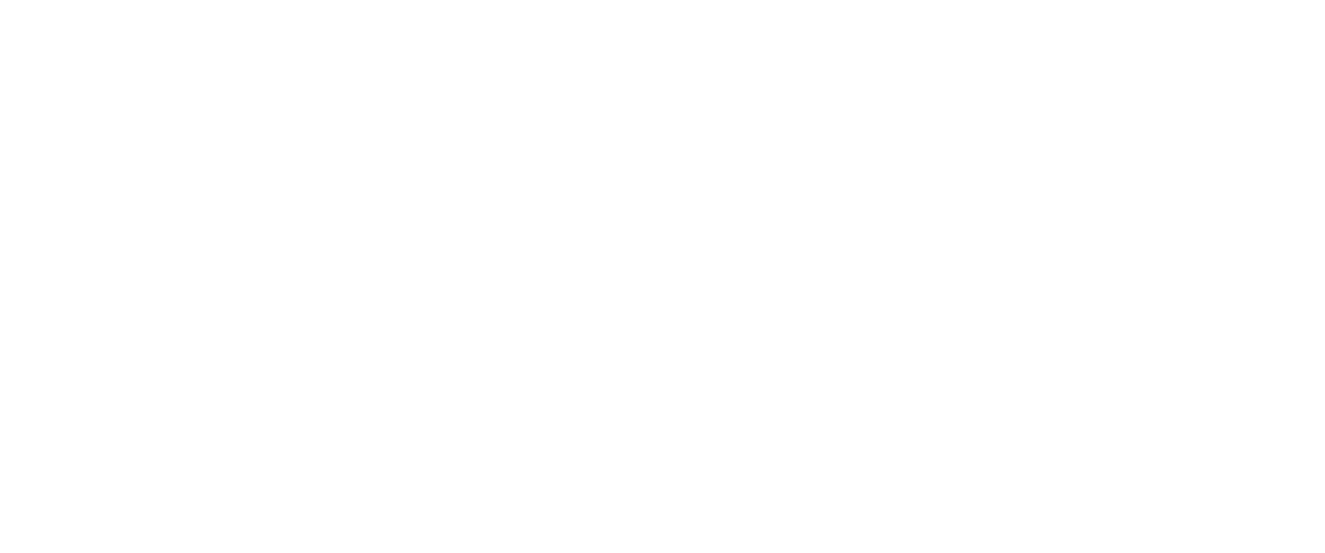

In [ ]:
import numpy as np
import plotly.express as px
from sklearn.datasets import make_blobs

# Create three-dimensional blobs
n_samples = 100
n_features = 3
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

# Create a DataFrame for Plotly
import pandas as pd
df = pd.DataFrame({'X': X[:, 0], 'Y': X[:, 1], 'Z': X[:, 2], 'Cluster': y})

# Create an interactive 3D scatter plot with Plotly
fig = px.scatter_3d(df, x='X', y='Y', z='Z', color='Cluster', title='Scatter Plot')
fig.update_layout(scene=dict(aspectmode='cube'))

# Show the plot
fig.show()


## Proyecciones de puntos en un vector

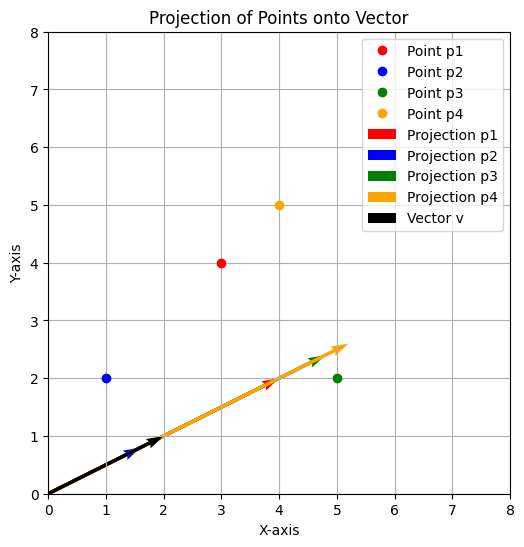

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vector v as a numpy array
v = np.array([2, 1])  # Example vector

# Define four points as numpy arrays
points = [
    np.array([3, 4]),   # Point p1
    np.array([1, 2]),   # Point p2
    np.array([5, 2]),   # Point p3
    np.array([4, 5])    # Point p4
]

color = ["red", "blue", "green", "orange"]

# Calculate the projection of each point onto v and store them in a list
projections = []
for p in points:
    dot_product = np.dot(p, v)
    v_dot_v = np.dot(v, v)
    projection = (dot_product / v_dot_v) * v
    projections.append(projection)

# Create a plot to visualize the vector v, points, and their projections
plt.figure(figsize=(8, 6))

# Plot points
for i, p in enumerate(points):
    plt.plot(p[0], p[1],  'o', color=color[i], label=f'Point p{i+1}')

# Plot the projections
for i, projection in enumerate(projections):
    plt.quiver(0, 0, projection[0], projection[1], angles='xy', scale_units='xy', scale=1, color=color[i], label=f'Projection p{i+1}')

# Plot vector v
plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='black', label='Vector v')

# Set axis limits
plt.xlim(0, 8)
plt.ylim(0, 8)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()

# Show the plot
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Projection of Points onto Vector')
plt.show()

## Qué queremos?

Conseguir la proyección $\mathbf{w}$ que maximice la varianza de las proyecciones y minimice el error de proyección

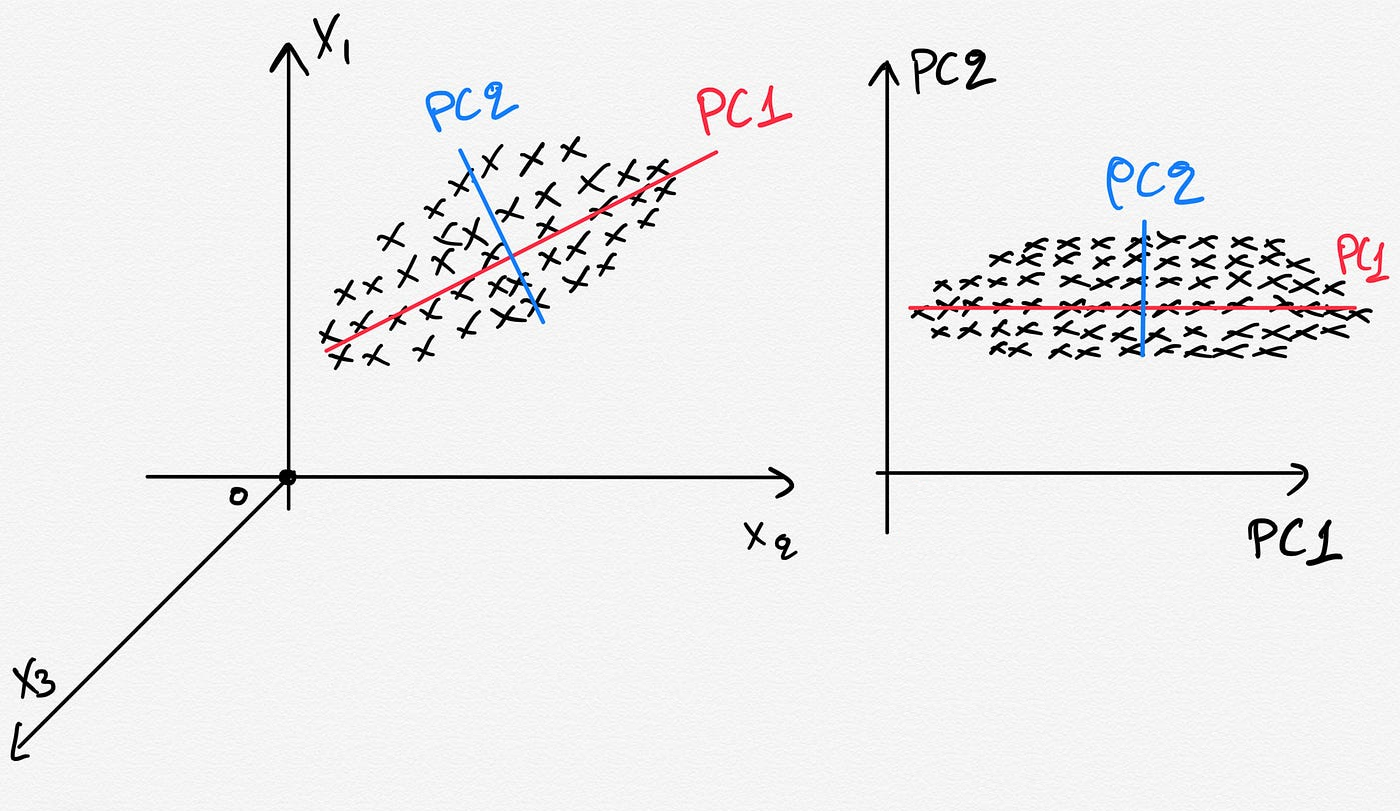

### [Definición preliminar] Autovectores y autovalores

Un autovector de una matriz $\mathbf{C}$ es, por definición, cualquier vector $\mathbf{v}$ tal que $$\mathbf{C v}=\lambda \mathbf{v}$$ y decimos que $\lambda$ es el autovalor asociado a $\mathbf{v}$

### [Definición preliminar] Proyección de $\mathbf{X}$ y su varianza

Si $\mathbf{X}$ es la matriz de datos centrada, entonces la proyección viene dada por $\mathbf{X} \mathbf{w}$ y la varianza viene calculada como:

$$
\frac{1}{n-1}(\mathbf{X} \mathbf{w})^{\top} \cdot \mathbf{X} \mathbf{w}=\mathbf{w}^{\top} \cdot\left(\frac{1}{n-1} \mathbf{X}^{\top} \mathbf{X}\right) \cdot \mathbf{w}=\mathbf{w}^{\top} \mathbf{C w}
$$

Donde $\mathbf{C}$ es la matriz de covarianza de $\mathbf{X}$



### [Definición] El problema de optimización a resolver

$$
\underset{w}{\operatorname{max}} \mathbf{w}^{\top} \mathbf{C w}
$$

con $\mathbf{C} \in \mathbb{S}^+_n$

Qué problema tenemos?

### [Solución] El problema de optimización a resolver

$$
\underset{w}{\operatorname{max}} \frac {\mathbf{w}^{\top} \mathbf{C w} }{\mathbf{w}^T\mathbf{w}}
$$

este problema es equivalente a resolver

$$
\underset{w}{\operatorname{max}} \mathbf{w}^{\top} \mathbf{C w}\text { sujeto a }
$$

$$\|\mathbf{w}\| = 1$$



### [Definición] El problema de componentes principales PCA

$$
\underset{w}{\operatorname{max}} \mathbf{w_i}^{\top} \mathbf{C w_i}\text { sujeto a }
$$

$$\|\mathbf{w_i}\| = 1 \\ \mathbf{w}_i^T \mathbf{w}_j=0 \quad \forall 1 \leq j<i $$



## Resumen

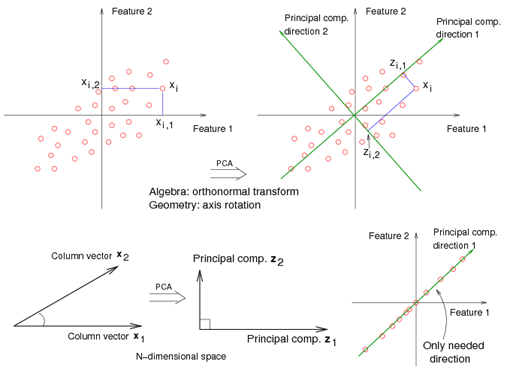

### Ejemplos

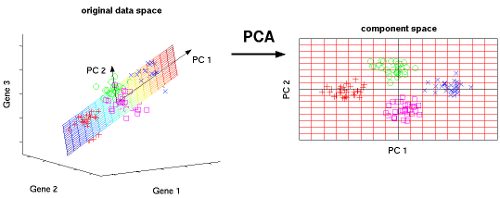

## Cargar versión pequeña de mnist

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits(n_class=6)

In [ ]:
X, y = digits.data, digits.target
n_samples, n_features = X.shape

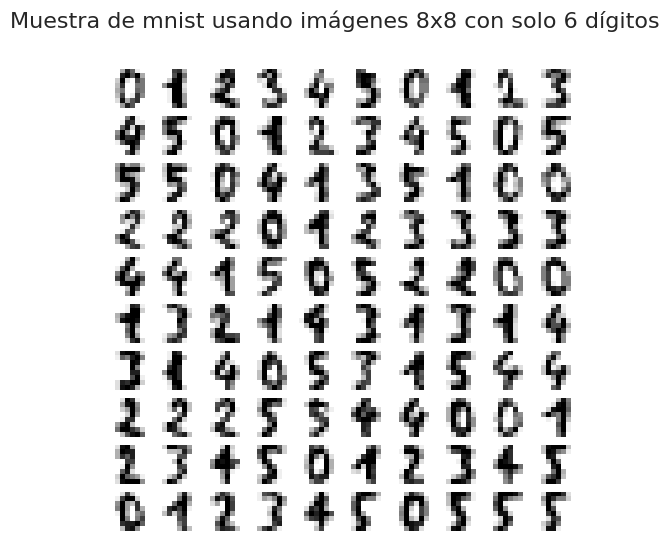

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Muestra de mnist usando imágenes 8x8 con solo 6 dígitos", fontsize=16)

## Mnist con todos los elementos

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA




## Transformar dataset con PCA

In [ ]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA to the data and transform the data into the reduced dimension
X_pca = pca.fit_transform(X)

In [ ]:
X.shape

(1083, 64)

Text(0, 0.5, 'Feature 2')

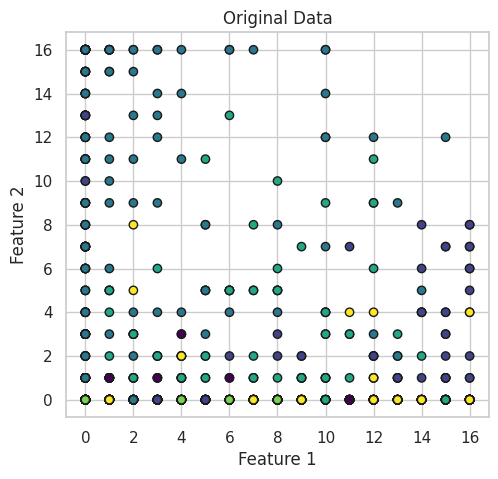

In [ ]:
# Create a scatter plot of the original dataset
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 5], X[:, 62], c=y, cmap='viridis', edgecolor='k')
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

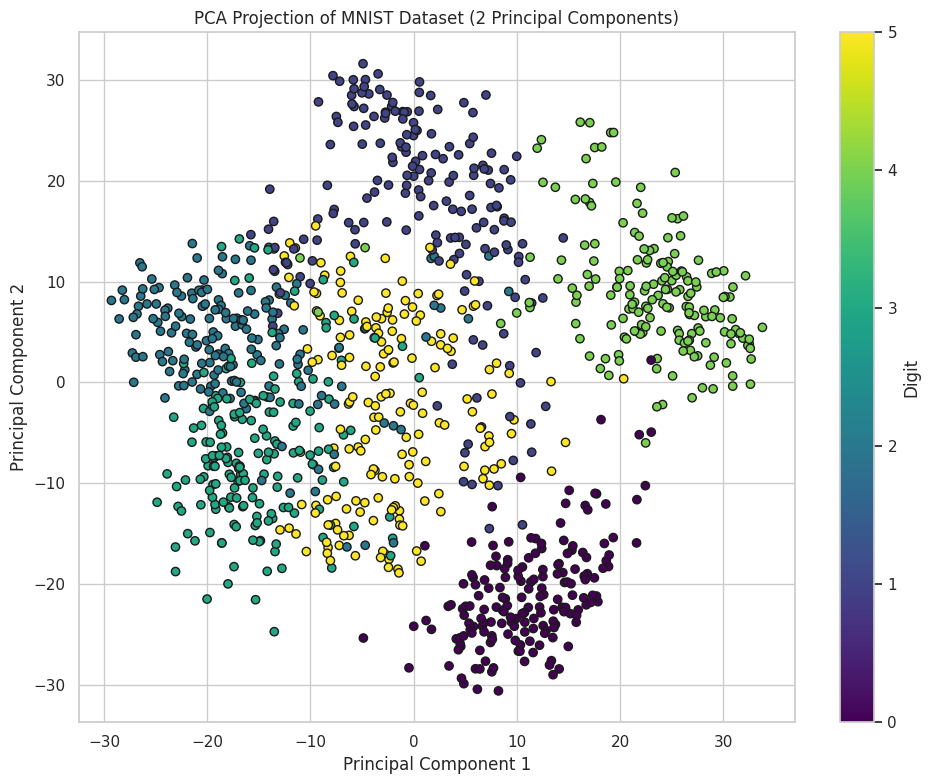

In [ ]:
# Create a scatter plot of the data in the space of the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.colorbar(label='Digit')
plt.title('PCA Projection of MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-70-10de8eaf850d>:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



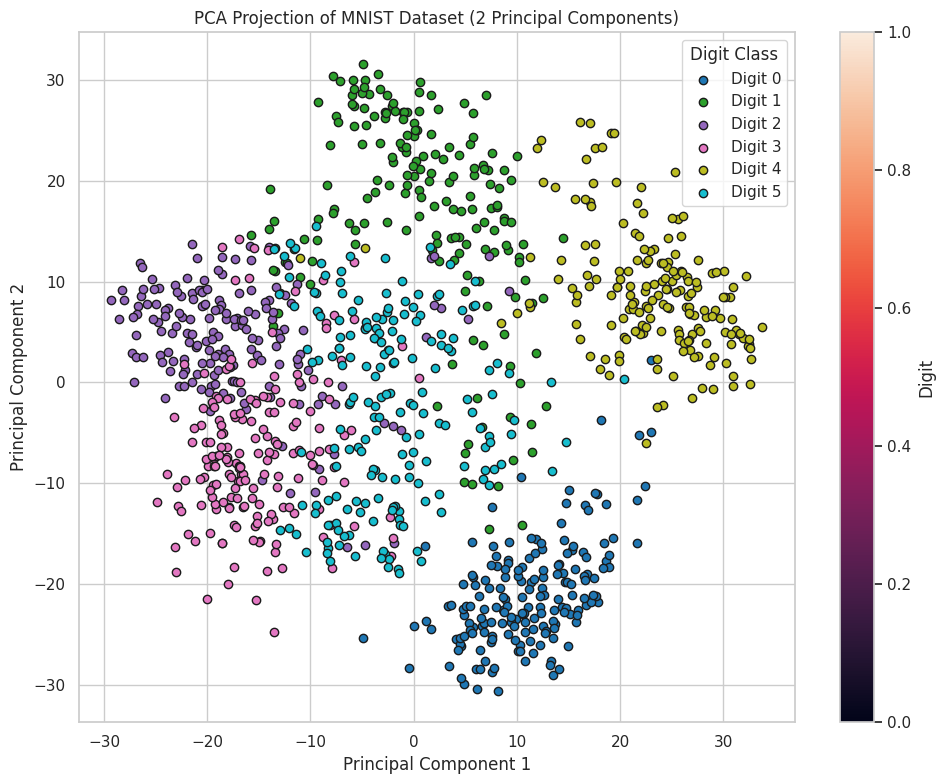

In [ ]:
# Create a scatter plot with a different color for each digit class
plt.figure(figsize=(10, 8))
unique_digits = np.unique(y)
colors = cm.get_cmap('tab10', len(unique_digits))
for digit in unique_digits:
    mask = (y == digit)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=colors(digit), label=f'Digit {digit}', edgecolor='k')

plt.colorbar(label='Digit')
plt.title('PCA Projection of MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit Class')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-55-2cac91763c67>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10', len(unique_digits))


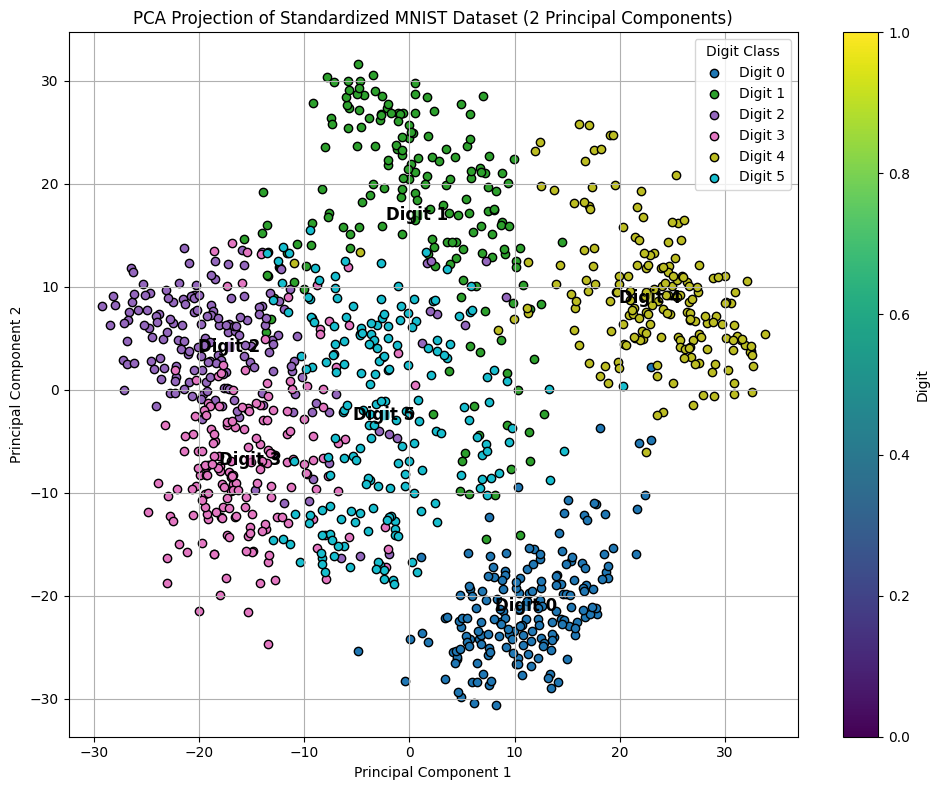

In [ ]:
from matplotlib import cm
from matplotlib.patches import FancyBboxPatch

# Create a scatter plot with a different color for each digit class
plt.figure(figsize=(10, 8))
unique_digits = np.unique(y)
colors = cm.get_cmap('tab10', len(unique_digits))
for digit in unique_digits:
    mask = (y == digit)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=colors(digit), label=f'Digit {digit}', edgecolor='k')

    # Calculate the centroid for each digit class
    centroid = np.mean(X_pca[mask], axis=0)

    # Create a shaded label background with improved contrast
    bbox = FancyBboxPatch((centroid[0] - 0.2, centroid[1] - 0.2), 0.4, 0.4, boxstyle="round,pad=0.3", ec="none", lw=2, fc=colors(digit, alpha=0.7))
    plt.gca().add_patch(bbox)

    # Add the label with improved contrast
    plt.text(centroid[0], centroid[1], f'Digit {digit}', fontsize=12, color='black', ha='center', va='center',
             weight='bold')

plt.colorbar(label='Digit')
plt.title('PCA Projection of Standardized MNIST Dataset (2 Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.legend(title='Digit Class')
plt.show()